**As a data engineer, you are required to investigate the Medical Appointment No Shows dataset. The dataset contains information about a set of doctor appointments. The goal is to investigate why a patient does not show up for his/her appointment.**
**The dataset contains 110527 entries and 14 columns. It shows basic information about a set of doctor appointments.**

# **Task 1** : Investigate the dataset

## Initializing Data

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [4]:
# Load data to a dataframe
df = pd.read_csv('KaggleV2-May-2016.csv')

In [5]:
df.shape

(110527, 14)

In [6]:
# Printing out column names in data
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
# Correcting typos in the column names 
df.columns = ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay','AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'no_show']
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'no_show'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  no_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# Checking an initial view on the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Investigate the distribution of the show-ups.

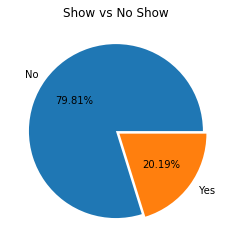

In [10]:
# Percentage of patients who show-up
plt.pie(df.no_show.value_counts(),labels=('No',' Yes'),autopct='%.2f%%', explode=(0, .05));
plt.title('Show vs No Show');

`The figure above shows that just 20% of appointments are no show and the rest attended.`



## Investigate the distribution of the gender.

In [11]:
# Printing the unique values in column 'Gender'
print("Unique Values in `Gender` => {}".format(df.Gender.unique()))

Unique Values in `Gender` => ['F' 'M']


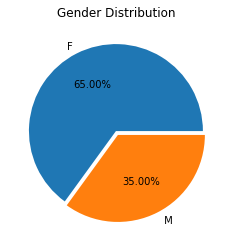

In [12]:
# Percentage of Males vs Females appointments
plt.pie(df.Gender.value_counts(),labels=('F',' M'),autopct='%.2f%%', explode=(0, .05));
plt.title('Gender Distribution');

## Investigate the distribution of the number of days between the appointment date and the scheduling date.

The ScheduledDay and AppointmentDay columns type should be changed to datetime.

In [13]:
# The ScheduledDay and AppointmentDay columns type should be changed to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  no_show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

Create a new column for the number of days between the appointment date and the scheduling date.

In [15]:
# Create a new column for the number of days between the appointment date and the scheduling date
df['WaitingDays'] = (df.AppointmentDay - df.ScheduledDay).dt.days 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  no_show         110527 non-null  object        
 14  WaitingDays     110527 non-null  int

In [16]:
# Print unique values in column 'WaitingDays'
print("Unique Values in `WaitingDays` => {}".format(df.WaitingDays.unique()))

Unique Values in `WaitingDays` => [  0   2   3   1   4   9  29  10  23  11  18  17  14  28  24  21  15  16
  22  43  30  31  42  32  56  45  46  39  37  38  44  50  60  52  53  65
  67  91  66  84  78  87 115 109  63  70  72  57  58  51  59  41  49  73
  64  20  33  34   6  35  36  12  13  40  47   8   5   7  25  26  48  27
  19  61  55  62 176  54  77  69  83  76  89  81 103  79  68  75  85 112
  -1  80  86  98  94 142 155 162 169 104 133 125  96  88  90 151 126 127
 111 119  74  71  82 108 110 102 122 101 105  92  97  93 107  95  -6 139
 132 179 117 146 123]


In [17]:
# Awaiting time can not be less than 0 (where schedule day is the same as appointment day). Appointments cannot happen before it is scheduled.
print('Before change: {}'.format(df[(df.WaitingDays < 0)].WaitingDays.value_counts()))

# Remove all records with such values.
df = df[(df.WaitingDays >= 0)]

# Check if any WaitingDays values below 0 are left in the dataset.
print('After change: {}'.format(df[(df.WaitingDays < 0)].WaitingDays.value_counts()))

Before change: -1    4
-6    1
Name: WaitingDays, dtype: int64
After change: Series([], Name: WaitingDays, dtype: int64)


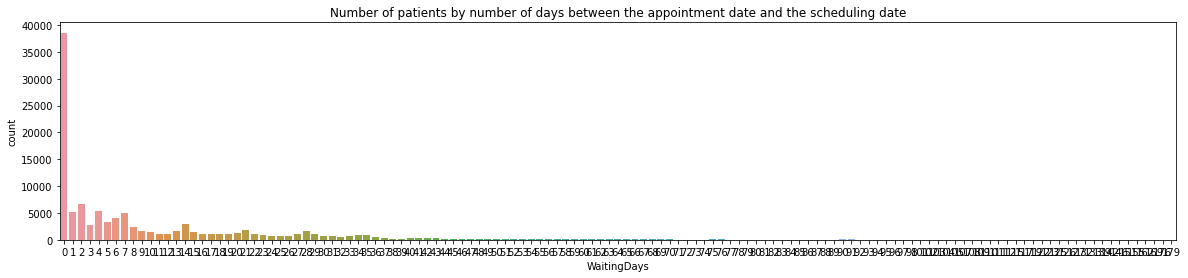

In [18]:
# Plot a relation between number of patients and their awaiting days
plt.figure(figsize=(20,4))
plt.xticks(rotation=0)
ax = sns.countplot(x=df.WaitingDays)
ax.set_title("Number of patients by number of days between the appointment date and the scheduling date")
plt.show()

In [19]:
# Counting the awaiting days where WaitingDays == 0
Waiting0 = df[(df.WaitingDays == 0)].WaitingDays.value_counts()
Waiting0

0    38563
Name: WaitingDays, dtype: int64

`It is worth to notice that almost 40k patients scheduled their visit for the same day.`



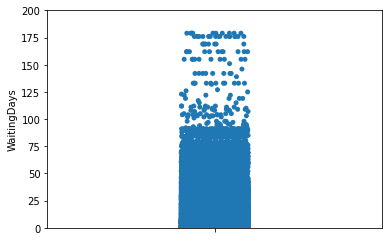

In [20]:
# Plot WaitingDays
sns.stripplot(data = df, y = 'WaitingDays', jitter = True)
plt.ylim(0, 200)
plt.show();

`It seems that most of the appointments happen within 100 days (3 months) from being scheduled`

## Investigate whether the appointment date is a weekday or a weekend.

Create a new column to investigate whether the appointment day of the week is a weekday or a weekend.



In [21]:
# Create a new column to investigate whether the appointment day of the week is a weekday or a weekend
# Create AppointmentDOW (appointment day of the week) column
df['AppointmentDOW'] = df.ScheduledDay.dt.day_name()

In [22]:
df['AppointmentDOW'].value_counts()

Tuesday      26167
Wednesday    24259
Monday       23085
Friday       18915
Thursday     18072
Saturday        24
Name: AppointmentDOW, dtype: int64

In [23]:
# Print the unique values in column 'AppointmentDOW'
print("Unique Values in `AppointmentDOW` => {}".format(df.AppointmentDOW.unique()))

Unique Values in `AppointmentDOW` => ['Friday' 'Wednesday' 'Tuesday' 'Thursday' 'Monday' 'Saturday']


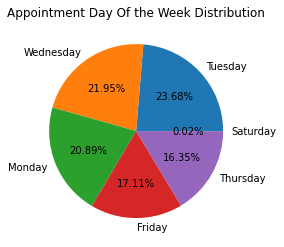

In [24]:
# Plot the distribution of appointment days 
plt.pie(df.AppointmentDOW.value_counts(),labels = ('Tuesday', 'Wednesday', 'Monday', 'Friday', 'Thursday', 'Saturday'), autopct='%.2f%%');
plt.title('Appointment Day Of the Week Distribution');

In [25]:
# Create column 'IsWeekend' 
df["IsWeekend"] = df["AppointmentDOW"] == 'Saturday'

In [26]:
# Print the unique values in column 'IsWeekend'
print("Unique Values in `IsWeekend` => {}".format(df.IsWeekend.unique()))

Unique Values in `IsWeekend` => [False  True]


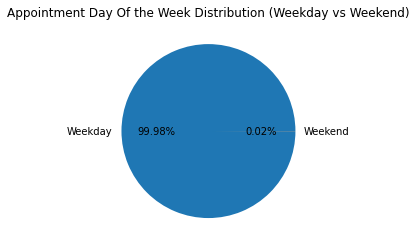

In [27]:
# Plot 'IsWeekend'
plt.pie(df.IsWeekend.value_counts(),labels = ('Weekday', 'Weekend'), autopct='%.2f%%');
plt.title('Appointment Day Of the Week Distribution (Weekday vs Weekend)');

## Investigate whether the scheduling date is a weekday or a weekend.

Create a new column to investigate whether the schedule day of the week is a weekday or a weekend.

In [28]:
# Create a new column to investigate whether the scheduling day of the week is a weekday or a weekend
# Create ScheduleDOW (schedule day of the week) column
df['ScheduleDOW'] = df.AppointmentDay.dt.day_name()

In [29]:
df['ScheduleDOW'].value_counts()

Wednesday    25866
Tuesday      25638
Monday       22714
Friday       19019
Thursday     17246
Saturday        39
Name: ScheduleDOW, dtype: int64

In [30]:
# Print unique values in column 'ScheduleDOW'
print("Unique Values in `ScheduleDOW` => {}".format(df.ScheduleDOW.unique()))

Unique Values in `ScheduleDOW` => ['Friday' 'Tuesday' 'Monday' 'Wednesday' 'Thursday' 'Saturday']


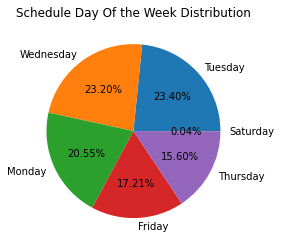

In [31]:
# Plot the distribution of scheduling days 
plt.pie(df.ScheduleDOW.value_counts(),labels = ('Tuesday', 'Wednesday', 'Monday', 'Friday', 'Thursday', 'Saturday'), autopct='%.2f%%');
plt.title('Schedule Day Of the Week Distribution');

In [32]:
# Create column 'IsWeekend2' 
df["IsWeekend2"] = df["ScheduleDOW"] == 'Saturday'

In [33]:
# Print the unique values in column 'IsWeekend2' 
print("Unique Values in `IsWeekend` => {}".format(df.IsWeekend2.unique()))

Unique Values in `IsWeekend` => [False  True]


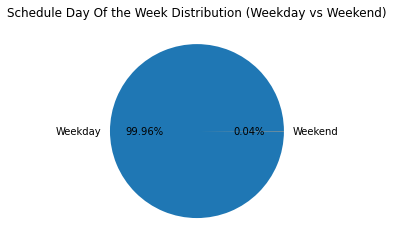

In [34]:
# Plot 'IsWeekend2'
plt.pie(df.IsWeekend2.value_counts(),labels = ('Weekday', 'Weekend'), autopct='%.2f%%');
plt.title('Schedule Day Of the Week Distribution (Weekday vs Weekend)');

# **Question (1)** : Who are the patients with the highest number of no-show-ups?

In [35]:
# Changing PatientId from float to integer
df.PatientId = df.PatientId.astype('int64')

In [36]:
# Create variables for ShowUps and NoShowUps
not_show = df.no_show=="Yes"
show_up = df.no_show=="No"

In [37]:
# Explore no-show for each PatientId
df.PatientId[not_show].value_counts()

1421986987763      18
563513528548171    16
5587789811398      15
581197334462339    14
65751443779385     13
                   ..
383933546241687     1
277258486593465     1
57955683817779      1
24934968661723      1
69237724436761      1
Name: PatientId, Length: 17661, dtype: int64

# **Question (2)** : What are the health conditions of patients with the highest number of no-show-ups?

In [38]:
# Create a new DataFrame 'df.ns' 
df.ns = df[['PatientId','Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'no_show' ]]
df.ns.columns = ['PatientId','Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'no_show']

<ipython-input-38-a3dc191ee993>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.ns = df[['PatientId','Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'no_show' ]]


In [39]:
# Create a copy of 'not_show' column
df.ns['not_show'] = df.loc[:, 'no_show']

<ipython-input-39-48e56a0426a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ns['not_show'] = df.loc[:, 'no_show']


In [40]:
# Replace values in the new column 'no_show' to (1,0)
df.ns = df.ns.replace({'not_show': {'Yes': 1, 'No': 0}})
df.ns.not_show = df.ns.not_show.astype('int64')

In [41]:
# Create a new column 'NumberOfNoShowUps' to sum the number of 'not_show' days for each 'PatientId'
df.ns['NumberOfNoShowUps'] = df.ns.groupby(['PatientId'])['not_show'].transform(sum)

In [42]:
# Create a new DataFrame 'df_ns2' to sort column 'NumberOfNoShowUps' descendingly
df_ns2 = df.ns.sort_values("NumberOfNoShowUps", ascending=False)
# Drop duplicated 'PatientId' 
df_ns2.duplicated(['PatientId','not_show']).sum()
# Drop unimportant columns
df_ns2.drop_duplicates(['PatientId','not_show'],inplace=True)
df_ns2.drop(['no_show', 'not_show'],axis= 1,inplace=True )
# Print the health conditions of patients with the highest number of no-show-ups
df_ns2

,PatientId,Hipertension,Diabetes,Alcoholism,Handcap,NumberOfNoShowUps
53400,1421986987763,0,0,0,1,18
95350,563513528548171,0,0,0,0,16
71701,5587789811398,0,0,0,0,15
55686,5587789811398,0,0,0,0,15
95288,581197334462339,0,0,0,0,14
...,...,...,...,...,...,...
46506,914618473283531,0,0,0,0,0
46503,658745131715268,0,0,0,0,0
46489,593278928532372,0,0,0,0,0
46498,42718446199687,0,0,0,0,0


# **Question (3)** : Who are the patients with the least number of no-show-ups?

In [45]:
# Create a new DataFrame 'df_ns3' to sort column 'NumberOfNoShowUps' ascendingly
df_ns3 = df.ns.sort_values("NumberOfNoShowUps", ascending=True)
# Drop duplicated 'PatientId' 
df_ns3.duplicated(['PatientId','not_show']).sum()
# Drop unimportant columns
df_ns3.drop_duplicates(['PatientId','not_show'],inplace=True)
df_ns3.drop(['no_show', 'not_show', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'],axis= 1,inplace=True )
# Print patients with the least number of no-show-ups
df_ns3

,PatientId,NumberOfNoShowUps
0,29872499824296,0
66136,5635445747187,0
66134,83812473215884,0
66133,558667152514825,0
66132,2191914686549,0
...,...,...
95271,581197334462339,14
53316,5587789811398,15
71701,5587789811398,15
95278,563513528548171,16


# **Question (4)** : What are the health conditions of patients with the least number of no-show-ups?

In [46]:
# Create a new DataFrame 'df_ns4' to sort column 'NumberOfNoShowUps' ascendingly
df_ns4 = df.ns.sort_values("NumberOfNoShowUps", ascending=True)
# Drop duplicated 'PatientId' 
df_ns4.duplicated(['PatientId','not_show']).sum()
# Drop unimportant columns
df_ns4.drop_duplicates(['PatientId','not_show'],inplace=True)
df_ns4.drop(['no_show', 'not_show'],axis= 1,inplace=True )
# Print the health conditions of patients with the least number of no-show-ups
df_ns4

,PatientId,Hipertension,Diabetes,Alcoholism,Handcap,NumberOfNoShowUps
0,29872499824296,1,0,0,0,0
66136,5635445747187,0,0,0,0,0
66134,83812473215884,0,0,0,0,0
66133,558667152514825,1,1,0,0,0
66132,2191914686549,0,0,0,0,0
...,...,...,...,...,...,...
95271,581197334462339,0,0,0,0,14
53316,5587789811398,0,0,0,0,15
71701,5587789811398,0,0,0,0,15
95278,563513528548171,0,0,0,0,16


# **Question (5)** : What are the neighborhoods with the highest no-show-ups?

In [48]:
# Create new DataFrame 'df.ng' for columns 'Neighbourhood' and 'no_show'
df.ng = df[['Neighbourhood', 'no_show' ]]
df.ng.columns = ['Neighbourhood', 'no_show']

<ipython-input-48-ff259125f9cd>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.ng = df[['Neighbourhood', 'no_show' ]]


In [49]:
# Create a copy of 'not_show' column
df.ng['not_show'] = df.ng.loc[:, 'no_show']

<ipython-input-49-76f25507f42e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ng['not_show'] = df.ng.loc[:, 'no_show']


In [50]:
# Replace values in column 'no_show' to (1,0)
df.ng = df.ng.replace({'not_show': {'Yes': 1, 'No': 0}})
df.ng.not_show = df.ng.not_show.astype('int64')

In [51]:
# Create a new column 'NumberOfNoShowUps' to sum the number of 'not_show' days for each 'Neighbourhood'
df.ng['NumberOfNoShowUps'] = df.ng.groupby(['Neighbourhood'])['not_show'].transform(sum)

In [52]:
# Create a new DataFrame 'df_ns2' to sort column 'NumberOfNoShowUps' descendingly
df_ng2 = df.ng.sort_values("NumberOfNoShowUps", ascending=False)
# Drop duplicated 'Neighbourhood' 
df_ng2.duplicated(['Neighbourhood','no_show']).sum()
df_ng2.drop_duplicates(['Neighbourhood'],inplace=True)
# Drop unimportant columns
df_ng2.drop(['no_show'],axis= 1,inplace=True )
# Print the neighborhoods with the highest no-show-ups
df_ng2

,Neighbourhood,not_show,NumberOfNoShowUps
67908,JARDIM CAMBURI,0,1465
37121,MARIA ORTIZ,1,1219
44090,ITARARÉ,0,923
31686,RESISTÊNCIA,0,905
100795,CENTRO,0,703
...,...,...,...
57017,ILHA DO BOI,0,3
90365,ILHA DO FRADE,1,2
48754,ILHAS OCEÂNICAS DE TRINDADE,1,2
24987,AEROPORTO,1,1


# **Task 2** : Train a machine learning model to classify the dataset. 

*Classification accuracy is the ratio of number of correct predictions to the total number of input samples, we calculated the accuracy of multiple classification algorithms through this code to choose the most suitable way of classification.*


In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree
import xgboost
from sklearn.model_selection import train_test_split

#Create Dependent and Independent Datasets based on our Dependent #and Independent features
X  = df[['Age', 'Gender','Scholarship', 'Hipertension', 'Diabetes',  'Alcoholism', 'Handcap', 'SMS_received', 'WaitingDays']]
y= df['no_show']

#Split the Data into Training and Testing sets with test size as #30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)
 
classifiers = []
 
model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = LogisticRegression()
classifiers.append(model5)
model6 =  KNeighborsClassifier()
classifiers.append(model6)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of XGBClassifier() is 0.7985040866182104
Confusion Matrix of XGBClassifier() is [[26460    11]
 [ 6670    16]]
Accuracy of SVC() is 0.7983532888982718
Confusion Matrix of SVC() is [[26471     0]
 [ 6686     0]]
Accuracy of DecisionTreeClassifier() is 0.7622824742889888
Confusion Matrix of DecisionTreeClassifier() is [[24027  2444]
 [ 5438  1248]]
Accuracy of RandomForestClassifier() is 0.7654492264076967
Confusion Matrix of RandomForestClassifier() is [[24033  2438]
 [ 5339  1347]]
Accuracy of LogisticRegression() is 0.7955182917634286
Confusion Matrix of LogisticRegression() is [[26276   195]
 [ 6585   101]]
Accuracy of KNeighborsClassifier() is 0.769279488494134
Confusion Matrix of KNeighborsClassifier() is [[24379  2092]
 [ 5558  1128]]


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110522 non-null  int64         
 1   AppointmentID   110522 non-null  int64         
 2   Gender          110522 non-null  object        
 3   ScheduledDay    110522 non-null  datetime64[ns]
 4   AppointmentDay  110522 non-null  datetime64[ns]
 5   Age             110522 non-null  int64         
 6   Neighbourhood   110522 non-null  object        
 7   Scholarship     110522 non-null  int64         
 8   Hipertension    110522 non-null  int64         
 9   Diabetes        110522 non-null  int64         
 10  Alcoholism      110522 non-null  int64         
 11  Handcap         110522 non-null  int64         
 12  SMS_received    110522 non-null  int64         
 13  no_show         110522 non-null  object        
 14  WaitingDays     110522 non-null  int

In [84]:
# Change data types in non int columns 
# Replace values in column 'no_show' to (1,0)
df = df.replace({'no_show': {'Yes': 1, 'No': 0}})
df.no_show = df.no_show.astype('int64')

In [85]:
# Replace values in column 'Gender' to (1,0)
df = df.replace({'Gender': {'F': 1, 'M': 0}})
df.Gender = df.Gender.astype('int64')

In [86]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,WaitingDays,AppointmentDOW,IsWeekend,ScheduleDOW,IsWeekend2
0,29872499824296,5642903,1,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,Friday,False,Friday,False
1,558997776694438,5642503,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Friday,False,Friday,False
2,4262962299951,5642549,1,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,Friday,False,Friday,False
3,867951213174,5642828,1,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,Friday,False,Friday,False
4,8841186448183,5642494,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,Friday,False,Friday,False


In [87]:
# Select certain features from dataset for testing
feature_cols = ['Age', 'Gender','Scholarship', 'Hipertension', 'Diabetes',  'Alcoholism', 'Handcap', 'SMS_received', 'WaitingDays']

In [88]:
# Split dataset in features and target variable
X = df[feature_cols].values
y = df["no_show"].values

In [89]:
# Split data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=22)

In [90]:
len(x_train), len(x_test)

(88417, 22105)

In [91]:
# Import Decision Tree Classifier
from sklearn import tree
# Create Decision Tree classifer object
X = x_train
Y = y_train
clf = tree.DecisionTreeClassifier(max_depth =4)
# Train Decision Tree Classifer
clf = clf.fit(X , Y)

[Text(0.5, 0.9, 'X[8] <= 0.5\ngini = 0.323\nsamples = 88417\nvalue = [70513, 17904]'),
 Text(0.25, 0.7, 'X[0] <= 20.5\ngini = 0.089\nsamples = 30859\nvalue = [29427, 1432]'),
 Text(0.125, 0.5, 'X[0] <= 6.5\ngini = 0.128\nsamples = 10363\nvalue = [9649, 714]'),
 Text(0.0625, 0.3, 'X[0] <= 0.5\ngini = 0.061\nsamples = 4728\nvalue = [4580, 148]'),
 Text(0.03125, 0.1, 'gini = 0.076\nsamples = 1143\nvalue = [1098, 45]'),
 Text(0.09375, 0.1, 'gini = 0.056\nsamples = 3585\nvalue = [3482, 103]'),
 Text(0.1875, 0.3, 'X[1] <= 0.5\ngini = 0.181\nsamples = 5635\nvalue = [5069, 566]'),
 Text(0.15625, 0.1, 'gini = 0.251\nsamples = 2491\nvalue = [2125, 366]'),
 Text(0.21875, 0.1, 'gini = 0.119\nsamples = 3144\nvalue = [2944, 200]'),
 Text(0.375, 0.5, 'X[0] <= 30.5\ngini = 0.068\nsamples = 20496\nvalue = [19778, 718]'),
 Text(0.3125, 0.3, 'X[3] <= 0.5\ngini = 0.085\nsamples = 3803\nvalue = [3634, 169]'),
 Text(0.28125, 0.1, 'gini = 0.086\nsamples = 3714\nvalue = [3546, 168]'),
 Text(0.34375, 0.1, 'gin

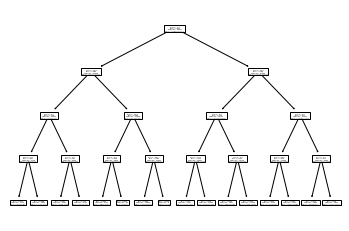

In [92]:
# Plot Decision Tree
tree.plot_tree(clf)

In [93]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [94]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8004976249717258


In [95]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


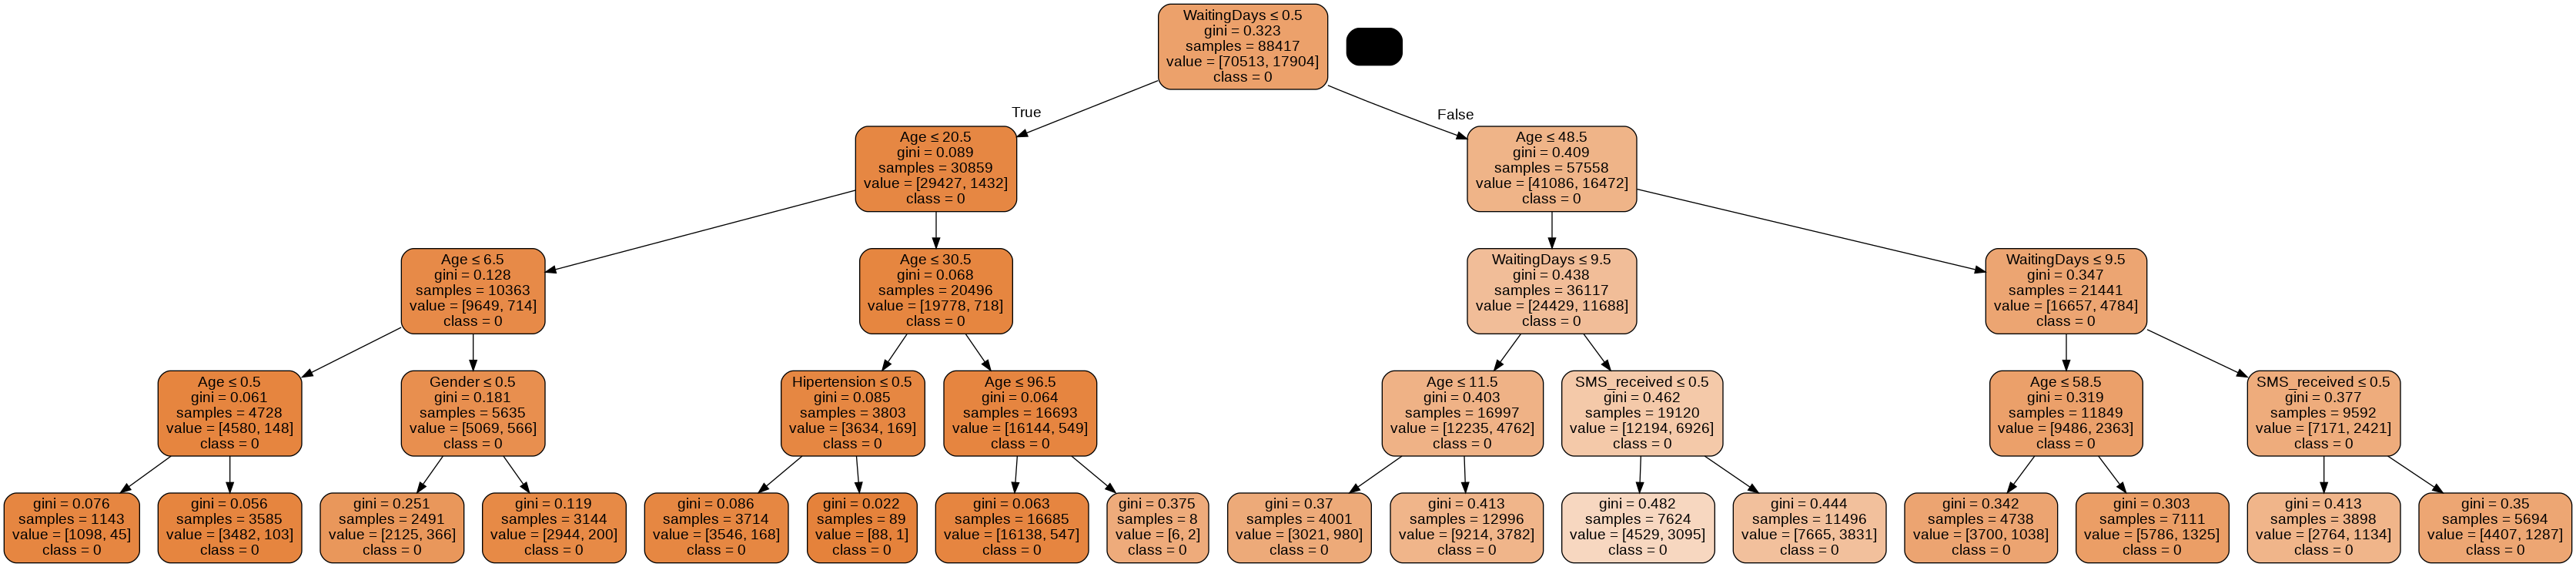

In [98]:
# Using Scikit-learn's export_graphviz function for display the decision tree. For plotting tree, we also to install graphviz and pydotplus.
# export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols , class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('noshow.png')
Image(graph.create_png())

In [66]:
# from sklearn import datasets
# from sklearn import svm
# clf2 = svm.SVC(kernel='linear')
# clf2.fit(X, Y)

In [67]:
# def plot_svc_decision_function(model, ax=None, plot_support=True):
#     """Plot the decision function for a 2D SVC"""
#     if ax is None:
#         ax = plt.gca()
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()
    
#     # create grid to evaluate model
#     x = np.linspace(xlim[0], xlim[1], 30)
#     y = np.linspace(ylim[0], ylim[1], 30)
#     Y, X = np.meshgrid(y, x)
#     xy = np.vstack([X.ravel(), Y.ravel()]).T
#     P = model.decision_function(xy).reshape(X.shape)
    
#     # plot decision boundary and margins
#     ax.contour(X, Y, P, colors='k',
#                levels=[-1, 0, 1], alpha=0.5,
#                linestyles=['--', '-', '--'])
    
#     # plot support vectors
#     if plot_support:
#         ax.scatter(model.support_vectors_[:, 0],
#                    model.support_vectors_[:, 1],
#                    s=300, linewidth=1, facecolors='none');
#     ax.set_xlim(xlim)
#     ax.set_ylim(ylim)

In [68]:
# # plt.scatter(X[:, 0], X[:, 1], X[:,2], X[:,3], X[:,4], X[:,5], X[:,6], X[:,7], X[:,8], c=Y, s=50, cmap='autumn')
# plt.scatter(x_train[:,0], y_train[:,1] , c=y_train, s=50, cmap='autumn')

# plot_svc_decision_function(clf2);

In [69]:
# from sklearn import datasets
# from sklearn import svm

# h = .02  # step size in the mesh

# # we create an instance of SVM and fit out data. We do not scale our
# # data since we want to plot the support vectors

# C = 1.0  # SVM regularization parameter
# svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
# rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
# poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)
# lin_svc = svm.LinearSVC(C=C).fit(X, Y)

# # create a mesh to plot in
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# # title for the plots
# titles = ['SVC with linear kernel',
#           'LinearSVC (linear kernel)',
#           'SVC with RBF kernel',
#           'SVC with polynomial (degree 3) kernel']


# for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
#     plt.subplot(2, 2, i + 1)
#     plt.subplots_adjust(wspace=0.4, hspace=0.4)

#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#     # Plot also the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
#     plt.xlabel('Sepal length')
#     plt.ylabel('Sepal width')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())
#     plt.title(titles[i])

# plt.show()